# Introduction and Business Use Case

Analyzing company registration statistics helps in understanding market trends and assessing economic conditions, providing insights into periods of high and low business activity. This information is crucial for strategic planning and forecasting, enabling businesses to align their strategies with market dynamics. Additionally, for companies providing products or services to other businesses, these statistics can be valuable for evaluating their performance and positioning within the broader market.

Assessing the impact of legal and regulatory changes on the number of new company registrations provides insights into how policy shifts influence business activity. When laws and regulations become more favorable or streamlined, such as through simplified registration processes or tax incentives, the number of new registrations typically increases as entrepreneurs and investors are more encouraged to start new ventures. Conversely, stricter regulations or higher compliance costs can deter new business formations, leading to a decline in registrations.

# Loading Data

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('data/data.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

# Entry Data Exploration

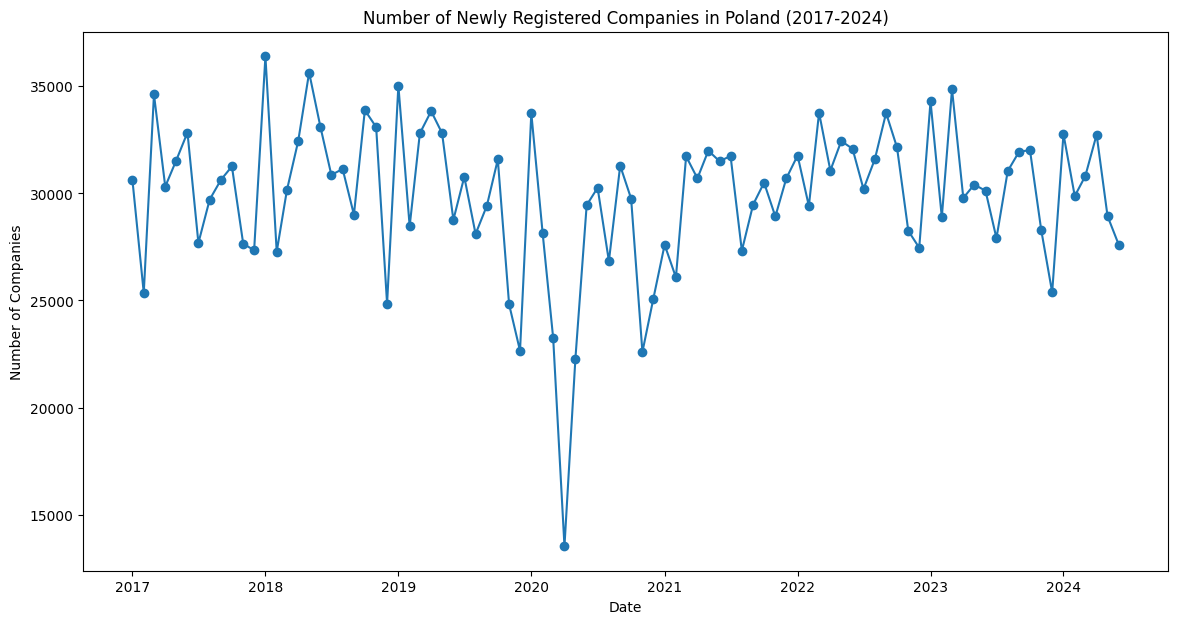

In [3]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['companies'], marker='o', linestyle='-')
plt.title('Number of Newly Registered Companies in Poland (2017-2024)')
plt.xlabel('Date')
plt.ylabel('Number of Companies')
plt.show()

In [4]:
# Calculate statistics
average = df['companies'].mean()
median = df['companies'].median()
std_dev = df['companies'].std()
min_value = df['companies'].min()
max_value = df['companies'].max()

# Print statistics
print(f'Average: {average:.2f}')
print(f'Median: {median:.2f}')
print(f'Standard Deviation: {std_dev:.2f}')
print(f'Minimum: {min_value}')
print(f'Maximum: {max_value}')

Average: 29919.76
Median: 30458.00
Standard Deviation: 3457.90
Minimum: 13521
Maximum: 36409


The average number of newly registered companies per period (e.g., month) is approximately 29,920. A standard deviation of 3,457.90 suggests that the number of registrations typically varies by about 3,458 companies from the average. 

In [5]:
# Find the row with the maximum value in 'companies'
max_value_row = df[df['companies'] == 36409]

# Extract the date from this row
max_value_date = pd.to_datetime(max_value_row['date'].values[0])
formatted_date = max_value_date.strftime('%B %Y')

print(f'The maximum number of company registrations ({max_value}) occurred in: {formatted_date}')

The maximum number of company registrations (36409) occurred in: January 2018


In [6]:
# Min and Max from dataset
min_date = df['date'].min()
max_date = df['date'].max()

print(f'Min date: {min_date}')
print(f'Max date: {max_date}')

Min date: 2017-01-01 00:00:00
Max date: 2024-06-01 00:00:00


The dataset spans from January 1, 2017, to June 1, 2024, covering a period of approximately 7 years and 5 months. During this time, the number of company registrations shows the following statistical characteristics:

* Average Registrations: The average number of new company registrations per period is 29,919.76.
* Median Registrations: The median value is 30,458.00, indicating that half of the periods had fewer than this number of registrations and the other half had more.
* Standard Deviation: The standard deviation of 3,457.90 shows that the number of registrations varies moderately around the average.
* Minimum Registrations: The lowest recorded number of registrations is 13,521, which represents the minimum level of activity during the observed period.
* Maximum Registrations: The highest number of registrations recorded is 36,409, indicating peak activity.

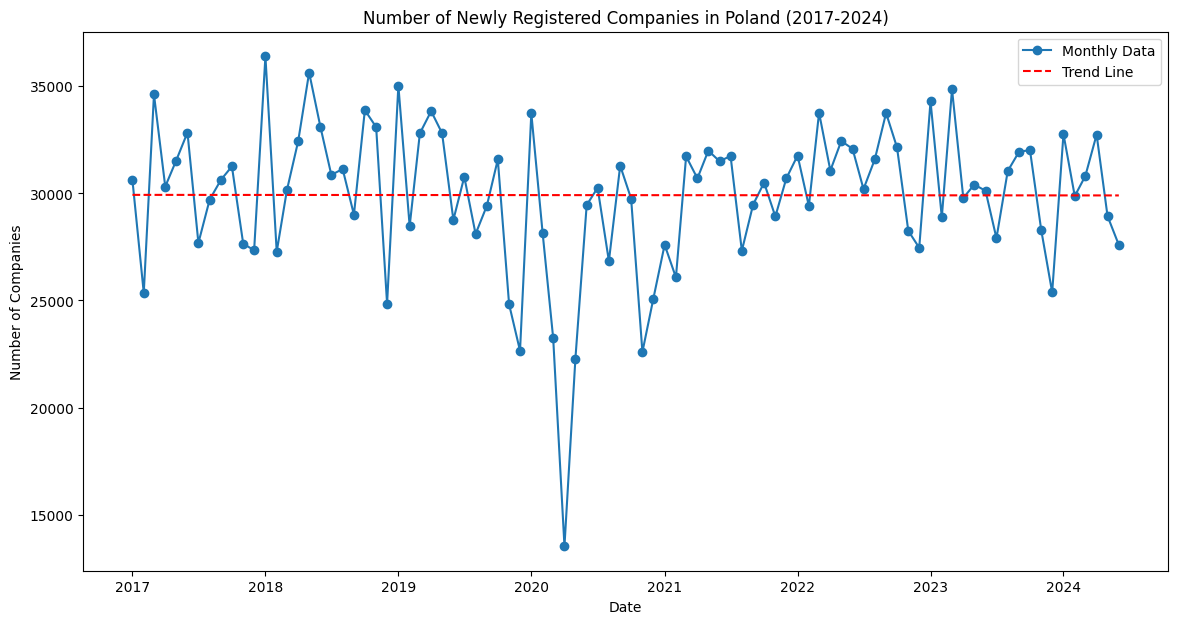

In [7]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['companies'], marker='o', linestyle='-', label='Monthly Data')

# Add a linear trend line
z = np.polyfit(df.index, df['companies'], 1)
p = np.poly1d(z)
plt.plot(df['date'], p(df.index), linestyle='--', color='red', label='Trend Line')

plt.title('Number of Newly Registered Companies in Poland (2017-2024)')
plt.xlabel('Date')
plt.ylabel('Number of Companies')
plt.legend()
plt.show()

In [8]:
# Finding the row with the minimum value in 'companies'
min_value_row = df[df['companies'] == min_value]

# Extracting the date from this row
min_value_date = min_value_row['date'].values[0]

print(f'Date when the number of company registrations was the lowest ({min_value}): {min_value_date}')

Date when the number of company registrations was the lowest (13521): 2020-04-01T00:00:00.000000000


Note: In Poland, there has been long-standing discourse about the growth in the number of newly established companies and the associated upward trend in economic performance. Policymakers, business leaders, and economists frequently highlight a positive trajectory in entrepreneurship and overall economic growth, suggesting that an increasing number of new businesses should reflect robust economic expansion.

However, the data does not always align with this narrative. 

In [9]:
# This minimum value is often considered an outlier or an anomaly because it represents an extreme data point compared to the rest of the dataset.
df = df[df['companies'] != min_value]

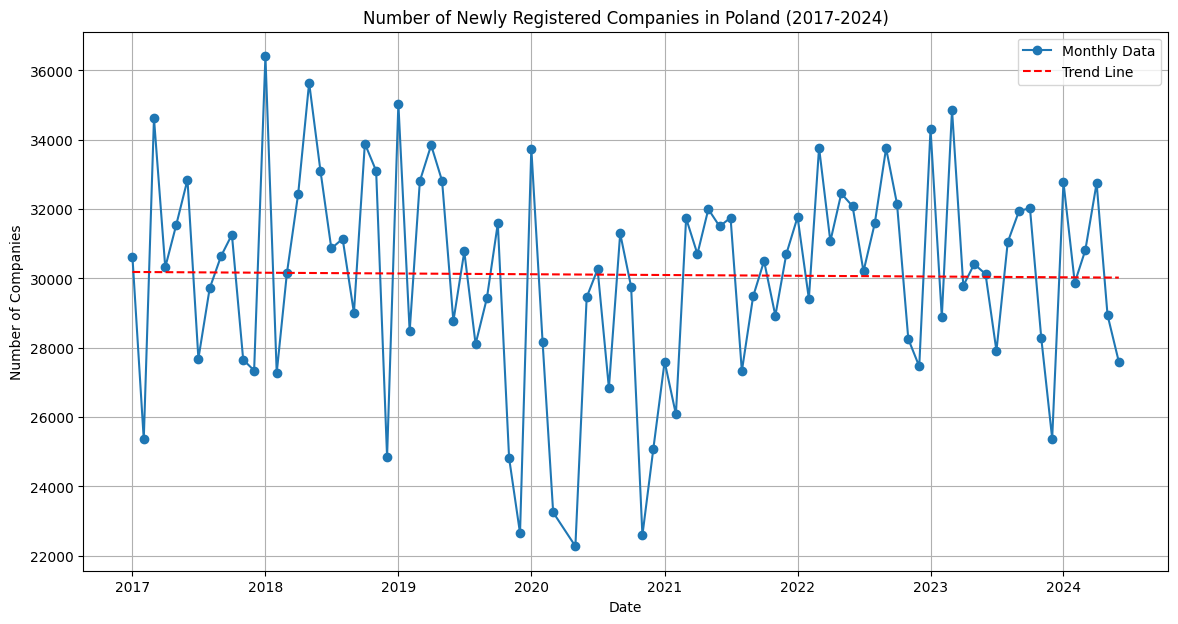

In [10]:
# Convert 'date' to ordinal numbers for linear regression
df['date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)

# Perform linear regressionb
z = np.polyfit(df['date_ordinal'], df['companies'], 1)
p = np.poly1d(z)

# Create the regression line
df['trend'] = p(df['date_ordinal'])

# Plot the data and the trend line
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['companies'], marker='o', linestyle='-', label='Monthly Data')
plt.plot(df['date'], df['trend'], linestyle='--', color='red', label='Trend Line')

plt.title('Number of Newly Registered Companies in Poland (2017-2024)')
plt.xlabel('Date')
plt.ylabel('Number of Companies')
plt.legend()
plt.grid(True)
plt.show()

Note: Despite expectations of rising company registrations and economic growth in Poland, the data shows a stable trend with no significant changes even after removing outliers.

We'll filter the data to focus on a more recent, smaller time range to observe trends with greater granularity. Starting from 2021.

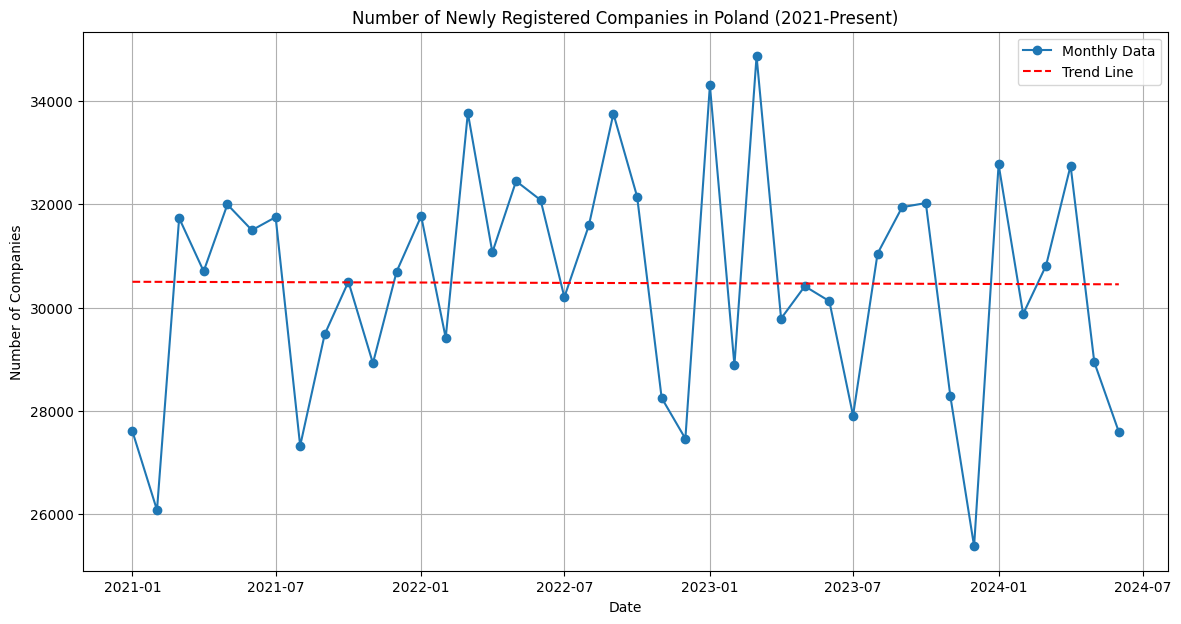

In [11]:
# Filter data from January 2021 to the present
start_date = '2021-01-01'
end_date = pd.to_datetime('today')
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)].copy()

# Convert 'date' to ordinal numbers for linear regression
filtered_df.loc[:, 'date_ordinal'] = filtered_df['date'].map(pd.Timestamp.toordinal)

# Perform linear regression
z = np.polyfit(filtered_df['date_ordinal'], filtered_df['companies'], 1)
p = np.poly1d(z)

# Create the regression line
filtered_df.loc[:, 'trend'] = p(filtered_df['date_ordinal'])

# Plot the data and the trend line
plt.figure(figsize=(14, 7))
plt.plot(filtered_df['date'], filtered_df['companies'], marker='o', linestyle='-', label='Monthly Data')
plt.plot(filtered_df['date'], filtered_df['trend'], linestyle='--', color='red', label='Trend Line')

plt.title('Number of Newly Registered Companies in Poland (2021-Present)')
plt.xlabel('Date')
plt.ylabel('Number of Companies')
plt.legend()
plt.grid(True)
plt.show()

# Forecast

In [12]:
from prophet import Prophet
from prophet.plot import plot_components

df['date'] = pd.to_datetime(df['date'])
df = df.rename(columns={'date': 'ds', 'companies': 'y'})

Importing plotly failed. Interactive plots will not work.


In [13]:
# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(df)

20:27:23 - cmdstanpy - INFO - Chain [1] start processing
20:27:23 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
# Create a dataframe for future dates (next 6 months)
future = model.make_future_dataframe(periods=6, freq='M')

# Make predictions
forecast = model.predict(future)

In [15]:
print("Forecast columns:", forecast.columns)

Forecast columns: Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


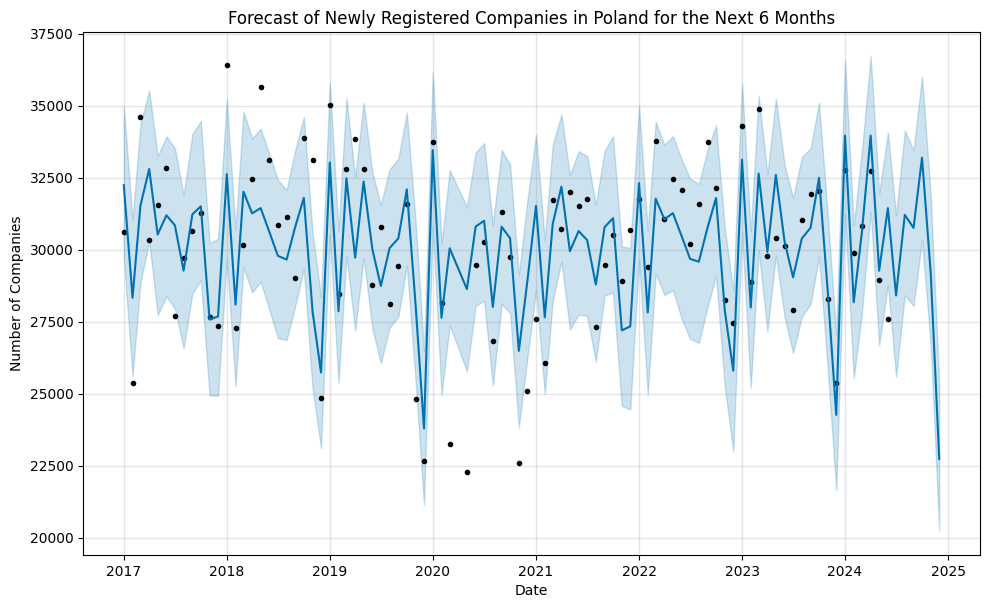

In [16]:
# Plot the results
fig = model.plot(forecast)
plt.title('Forecast of Newly Registered Companies in Poland for the Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Number of Companies')
plt.show()

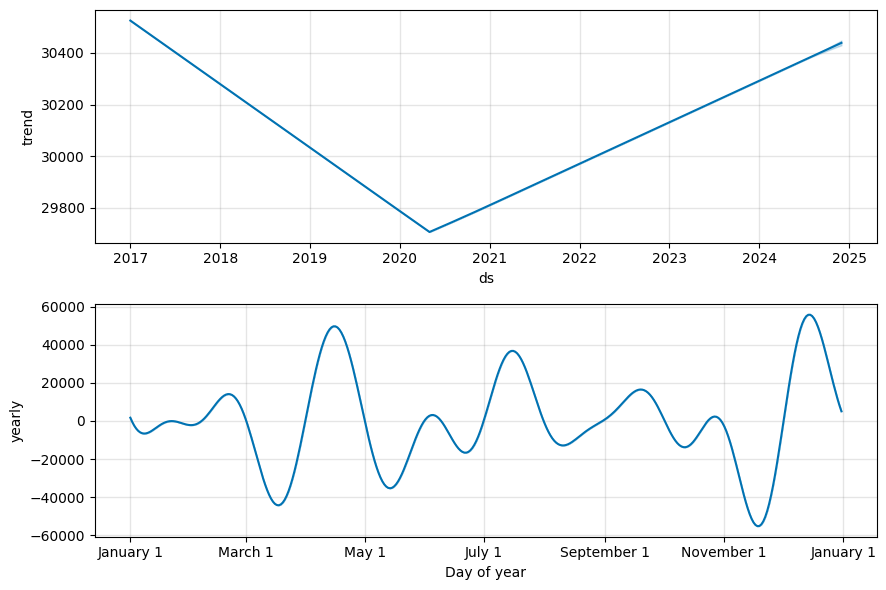

In [17]:
# Plot the components including adjusted seasonality
fig = plot_components(model, forecast)
plt.show()

The data reveals a clear upward trend in the number of business foundations since 2020. Although the growth may not be as dramatic as some media reports suggest, it is nonetheless significant. This steady increase reflects a positive and ongoing shift in entrepreneurial activity, even if it falls short of the more sensationalized portrayals in the media.

In [18]:
# Filter the forecast DataFrame to include only relevant columns
forecast_filtered = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_filtered = forecast_filtered.rename(columns={'ds': 'date', 'yhat': 'predicted', 'yhat_lower': 'predicted_lower', 'yhat_upper': 'predicted_upper'})

# Print columns and head of filtered forecast DataFrame
print("Filtered forecast columns:", forecast_filtered.columns)
print("Filtered forecast head:\n", forecast_filtered.head())

# Rename 'date' in forecast_filtered to 'ds' to match df
forecast_filtered = forecast_filtered.rename(columns={'date': 'ds'})

merged_df = pd.merge(df, forecast_filtered, on='ds', how='left')

Filtered forecast columns: Index(['date', 'predicted', 'predicted_lower', 'predicted_upper'], dtype='object')
Filtered forecast head:
         date     predicted  predicted_lower  predicted_upper
0 2017-01-01  32237.449902     29706.229278     34957.424243
1 2017-02-01  28330.185279     25603.528394     31019.734085
2 2017-03-01  31531.657993     28859.024101     34361.871427
3 2017-04-01  32800.110845     30282.922232     35522.905749
4 2017-05-01  30526.402773     27730.346868     33247.720230


In [19]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(merged_df['y'], merged_df['predicted']))

# Calculate MAPE
merged_df['absolute_percentage_error'] = np.abs((merged_df['y'] - merged_df['predicted']) / merged_df['y'])
mape = merged_df['absolute_percentage_error'].mean() * 100  # Multiply by 100 to get percentage

# Print the error metrics
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Root Mean Squared Error (RMSE): 2122.15
Mean Absolute Percentage Error (MAPE): 5.59%


MAPE represents the average percentage error between the predicted and actual values. A MAPE of 5.59% indicates that, on average, the model's predictions are off by about 5.59% from the actual values.

Both RMSE and MAPE are within acceptable ranges, suggesting that the model provides reasonably accurate predictions for the number of new company registrations.

For business and economic planning, this level of accuracy in forecasts can be quite useful for making informed decisions about future company registrations and market strategies.

# Different Paramethers for better results (possibly)

In [20]:
def calculate_metrics(actual, predicted):
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    
    # Calculate MAPE
    absolute_percentage_error = np.abs((actual - predicted) / actual)
    mape = absolute_percentage_error.mean() * 100
    
    return rmse, mape

models = [
    {"name": "Default Model", "params": {"yearly_seasonality": True}},
    {"name": "No Seasonality", "params": {"yearly_seasonality": False}},
    {"name": "Add Quarterly Seasonality", "params": {"yearly_seasonality": True}},
    {"name": "Multiplicative Seasonality", "params": {"yearly_seasonality": True, "seasonality_mode": "multiplicative"}},
]

results = []

In [21]:
for model_info in models:
    print(f"Testing model: {model_info['name']}")
    
    # Initialize the model with specified parameters
    model_params = model_info['params']
    model = Prophet(**model_params)
    
    # Add custom quarterly seasonality if specified
    if model_info['name'] == "Add Quarterly Seasonality":
        model.add_seasonality(name='quarterly', period=91.25, fourier_order=8)
    
    # Fit the model
    model.fit(df)
    
    # Create a DataFrame for future dates within the test period
    future = model.make_future_dataframe(periods=6, freq='M')  # Use 'M' for monthly data
    forecast = model.predict(future)
    
    # Filter forecast for merging
    forecast_filtered = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    forecast_filtered = forecast_filtered.rename(columns={'ds': 'date', 'yhat': 'predicted', 'yhat_lower': 'predicted_lower', 'yhat_upper': 'predicted_upper'})
    
    # Merge actual and predicted data
    merged_df = pd.merge(df, forecast_filtered, left_on='ds', right_on='date', how='left')
    
    # Drop rows with NaN values
    merged_df = merged_df.dropna(subset=['predicted'])
    
    # Calculate RMSE and MAPE
    rmse, mape = calculate_metrics(merged_df['y'], merged_df['predicted'])
    
    # Store results
    results.append({"Model": model_info['name'], "RMSE": rmse, "MAPE": mape})

# Print results
results_df = pd.DataFrame(results)
print(results_df)

20:27:24 - cmdstanpy - INFO - Chain [1] start processing
20:27:24 - cmdstanpy - INFO - Chain [1] done processing


Testing model: Default Model


20:27:24 - cmdstanpy - INFO - Chain [1] start processing
20:27:24 - cmdstanpy - INFO - Chain [1] done processing


Testing model: No Seasonality


20:27:24 - cmdstanpy - INFO - Chain [1] start processing


Testing model: Add Quarterly Seasonality


20:27:25 - cmdstanpy - INFO - Chain [1] done processing
20:27:25 - cmdstanpy - INFO - Chain [1] start processing


Testing model: Multiplicative Seasonality


20:27:25 - cmdstanpy - INFO - Chain [1] done processing


                        Model         RMSE      MAPE
0               Default Model  2122.151110  5.586115
1              No Seasonality  2981.790986  8.112442
2   Add Quarterly Seasonality  1855.458143  5.038162
3  Multiplicative Seasonality  2131.268027  5.610145


# Best Model Showcase and Results Overview

In [22]:
# Initialize and fit the best model with quarterly seasonality
best_model = Prophet(yearly_seasonality=True)
best_model.add_seasonality(name='quarterly', period=91.25, fourier_order=8)
best_model.fit(df)

# Create a DataFrame for future dates within the test period
future = best_model.make_future_dataframe(periods=6, freq='M')  # Use 'M' for monthly data
forecast = best_model.predict(future)

20:27:25 - cmdstanpy - INFO - Chain [1] start processing
20:27:25 - cmdstanpy - INFO - Chain [1] done processing


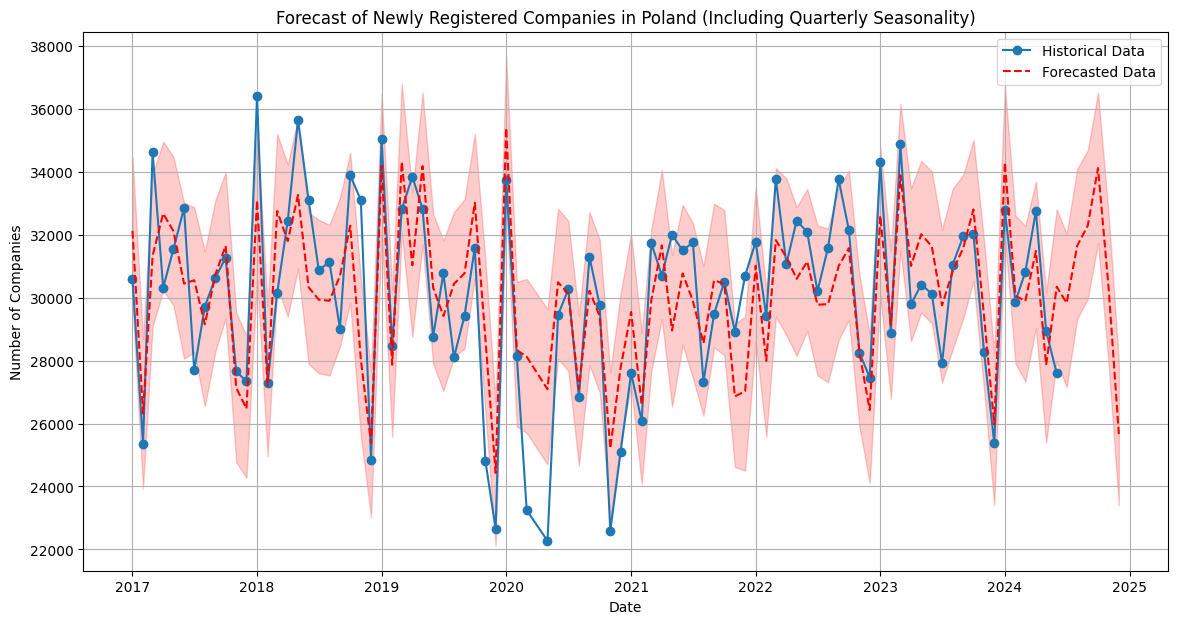

In [23]:
# Plot the data and forecast
plt.figure(figsize=(14, 7))

# Plot the historical data
plt.plot(df['ds'], df['y'], marker='o', linestyle='-', label='Historical Data')

# Plot the forecasted data
plt.plot(forecast['ds'], forecast['yhat'], linestyle='--', color='red', label='Forecasted Data')

# Plot the forecast uncertainty intervals
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)

plt.title('Forecast of Newly Registered Companies in Poland (Including Quarterly Seasonality)')
plt.xlabel('Date')
plt.ylabel('Number of Companies')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Filter the forecast to show only the future dates
future_predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
future_predictions = future_predictions.rename(columns={'ds': 'date', 'yhat': 'predicted', 'yhat_lower': 'predicted_lower', 'yhat_upper': 'predicted_upper'})

# Print the predictions table
print("Predictions for the next 6 months:")
print(future_predictions.tail(6))  # Display the last 6 rows of future predictions

Predictions for the next 6 months:
         date     predicted  predicted_lower  predicted_upper
89 2024-06-30  29829.708215     27151.012227     32023.750175
90 2024-07-31  31648.670707     29328.655724     34082.545530
91 2024-08-31  32289.721184     29958.914894     34687.802290
92 2024-09-30  34114.390146     31736.036618     36518.066831
93 2024-10-31  30316.394354     27899.382728     32653.648781
94 2024-11-30  25664.886126     23404.880473     27990.286895


## Summary Project Note

Objective:
The goal of this project was to forecast the number of newly registered companies in Poland over the next 6 months using historical data from January 2017 to June 2024. Various models were tested to identify the best approach for accurate predictions.

Models Tested:

* Default Model: Prophet with default settings including yearly seasonality.
* No Seasonality: Prophet model without yearly seasonality.
* Add Quarterly Seasonality: Prophet model with added quarterly seasonality.
* Multiplicative Seasonality: Prophet model with yearly seasonality and multiplicative seasonality mode.

## Performance Metrics:

Add Quarterly Seasonality: RMSE = 1855.46, MAPE = 5.04%
This model showed the lowest RMSE and MAPE, making it the most accurate among the tested models.

## Forecast Results for the Next 6 Months:

| Date       | Predicted | Lower Bound | Upper Bound |
|------------|-----------|-------------|-------------|
| 2024-06-30 | 29,829.71 | 27,434.04   | 32,118.97   |
| 2024-07-31 | 31,648.67 | 29,310.87   | 34,091.49   |
| 2024-08-31 | 32,289.72 | 30,044.74   | 34,544.85   |
| 2024-09-30 | 34,114.39 | 31,824.03   | 36,633.28   |
| 2024-10-31 | 30,316.39 | 28,033.02   | 32,725.85   |
| 2024-11-30 | 25,664.89 | 23,416.77   | 28,169.67   |


The forecast for the next six months suggests fluctuations in the number of new company registrations with a general upward trend, 
followed by a decrease towards the end of the forecast period. The highest predicted value is in September 2024, while the lowest is in November 2024.